# Tippspiel Statistics

Now that the world cup is over and the dissappointment of Germany exiting the world cup early has moved on from being a [statistical blackswan](https://en.wikipedia.org/wiki/Black_swan_theory) event to an [anomaly](https://en.wikipedia.org/wiki/Anomaly_detection), a good closure for us fans would be to look back and check out our football fairness and prejudices with some graphs and numbers. 

In [1]:
%matplotlib inline
# Power of Charts
from IPython.display import Image
Image(url= "https://dougbelshaw.com/blog/wp-content/uploads/2009/05/dilbert_pie_chart.jpg")

# Getippt AEN WM 2018 

In [10]:
import os
from python_scripts.excel_read_test import tippspiel as tp_op
tp_stats = tp_op()
import warnings
warnings.filterwarnings('ignore')

Players:

In [3]:
number_players = len(tp_stats.player_list)
print("Number of players = ",number_players)
for player in tp_stats.player_list:
    print(player)
plot_version = 0

Number of players =  13
max09
ThomasB
NilsJ
HHalfmann
Christian586
Matthias_G
Krishna
Oeli
Lieseball
GregorB
Cornelius
ThomasSch
Eric90


# Plot settings

In [4]:
from ipywidgets import interact
from IPython.html.widgets import interact, fixed
def f(version):
    global plot_version
    plot_version = 0 if version=='color_blind_version' else 1

interact(f, version=['color_blind_version', 'normal_version']);


# Number of exact predictions

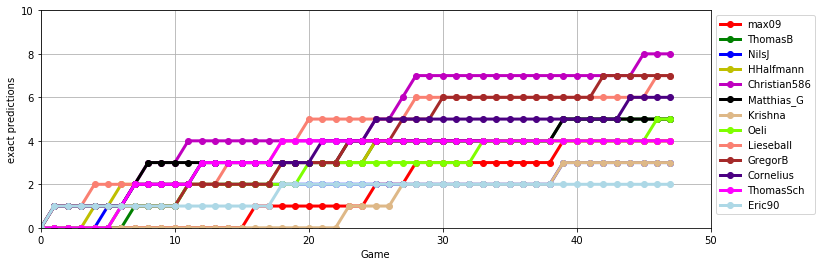

In [5]:

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import cycler
color_order = ['r','g','b','y','m','k','burlywood','chartreuse','salmon','brown','indigo','fuchsia','lightblue','goldenrod']
markers = ['.',',','o','v','<','>','1','2','3','4','8','s','p','*','h','+','x']
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00','dimgray','silver','darkgray','thistle']


def plot_vals(data ,ylim, player,colorblind):
    
    
    c_order = color_order if colorblind == 0 else CB_color_cycle
    n = player
    fig = plt.figure(figsize=(12,4))
    #plt.clf()
    for i,player_name in enumerate(tp_stats.player_list):
        
        if n != 0 and i != n-1:
            continue
        player= tp_stats.player_list[player_name]
        plot_array,plot_name = player.get_data(data)
        #xnew = np.linspace(0,len(player_pts),100)
        #xvals = np.arange(0,len(player_pts))
        #ynew = spline(xvals,player_pts,xnew)
        plt.plot(range(len(plot_array)),plot_array,label=player.name,color=c_order[i],linewidth=3,marker='o')
        #plt.plot(xnew, ynew, label=player.name)
        if n == 0:
            plt.legend(loc='best',bbox_to_anchor=(1, 1))
        else:
            plt.title(player_name)
        
        plt.grid(True)
        plt.xlabel('Game')
        plt.ylabel(plot_name.replace('_',' '))
        plt.xlim([0,50])
        plt.ylim([0,ylim])

ylim = 10
plot_type = 'exact'
interact(plot_vals,data=fixed(plot_type),ylim=fixed(ylim),player=(0,number_players),colorblind=(0,1));


# Number of correct predictions

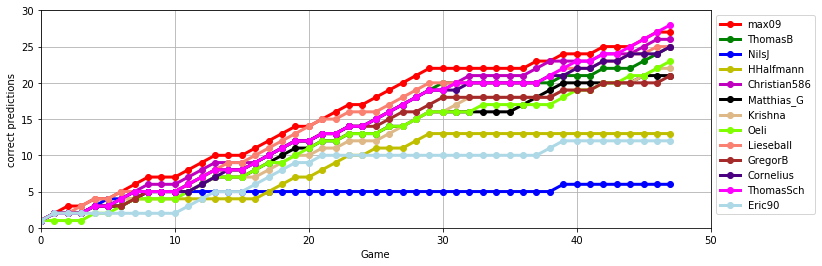

In [6]:
ylim = 30
interact(plot_vals,data=fixed('correct'),ylim=fixed(ylim),player=(0,number_players),colorblind=(0,1));

# Total points

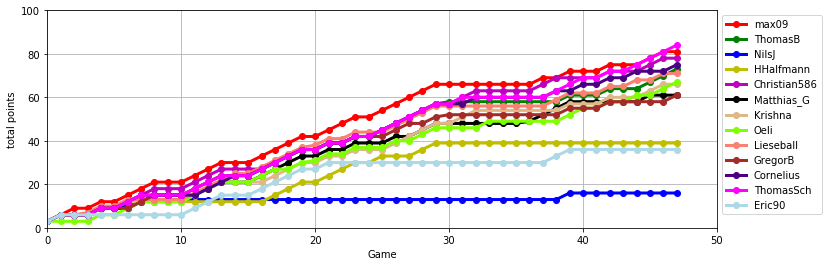

In [9]:
ylim = 100
interact(plot_vals,data=fixed('total_pts'),ylim=fixed(ylim),player=(0,number_players),colorblind=(0,1));

In [32]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
